# <center>Titanic Data Analysis</center>

### Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Initializing the dataframe

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
df.shape

(891, 12)

### Visualizing the data

Checking the relationship between variables

##### Checking the survival rate

In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

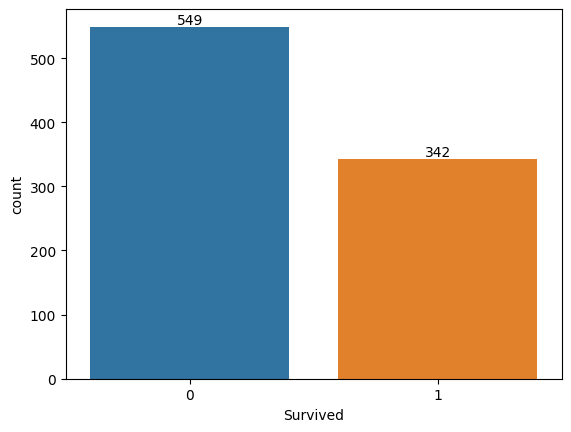

In [7]:
ax = sns.countplot(data=df, x="Survived")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

High number of people did not survive the tragedy.

##### Checking survival rate according to sex

In [8]:
cross = pd.crosstab(index=df['Survived'], columns=df["Sex"], margins=True)
cross

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


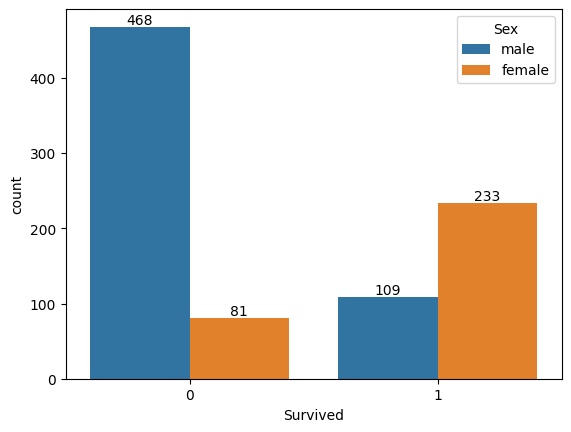

In [9]:
ax = sns.countplot(data=df, hue='Sex', x='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

More females survived as compared to males.

##### Checking if ticket class has any significance on survival rate

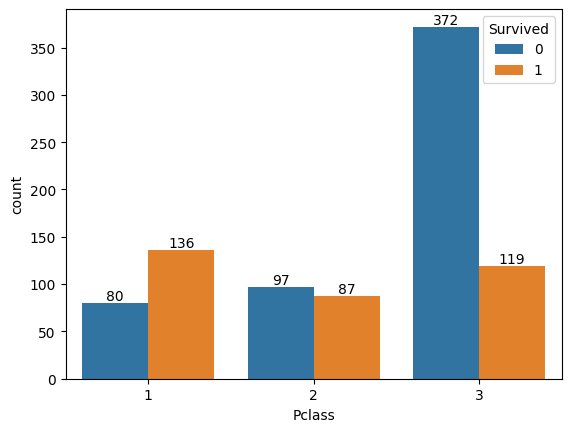

In [10]:
ax = sns.countplot(data=df, x='Pclass', hue='Survived')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

Passengers in 1st class were given more priority as compared to other 2 classes.  
Similarly, passengers in 3rd class were given the least priority.  
Also, there were more passengers on 3rd class as well.

##### Checking if the port of embarkment has any significance on survival rate

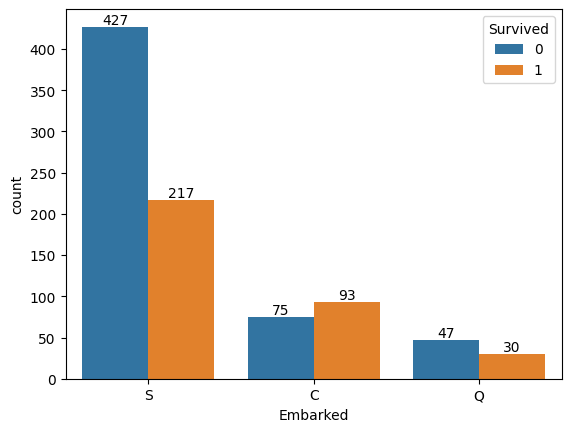

In [11]:
ax = sns.countplot(data=df, x='Embarked', hue='Survived')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

Since, large number of passengers got aboard the ship from Port S, many people from Southampton survived.

##### Checking the distribution of age of the passengers onboard

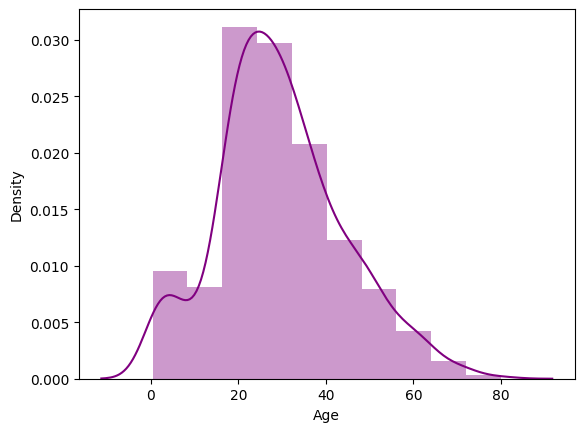

In [12]:
ax = sns.distplot(a=df['Age'], color='purple', bins=10)
plt.show()

There were more younger people (<40) onboard the doomed ship.

##### Checking the fare (price) for the voyage.

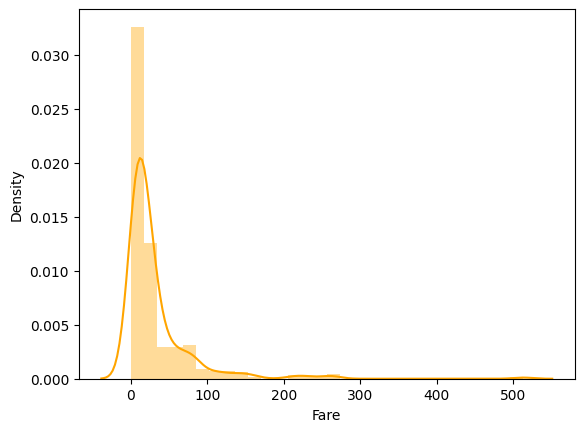

In [13]:
ax = sns.distplot(a=df['Fare'], color='orange', bins=30)
plt.show()

Here, the density of cheaper seat prices is high (<100).  
That explains the higher number of passengers in 3rd class.

### Data Wrangling

Cleaning the data by removing the NaN values and unnecessary columns in the dataset.

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Visualizing the null values in each column

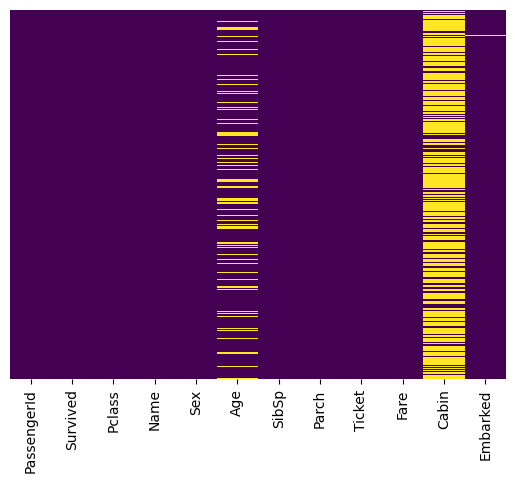

In [15]:
sns.heatmap(data=df.isnull(), yticklabels=False, cmap='viridis', cbar=False)
plt.show()

Here, we have high no. of null values in Cabin and Age columns.  
Since Cabin column is not significant for our analysis, we can simply drop the whole column.

In [16]:
df.drop('Cabin', axis=1, inplace=True)

Now, since the Cabin column is deleted, the no. of missing values in the dataframe should have been reduced.  
For age column, checking its skewness.

In [17]:
df['Age'].skew()

0.38910778230082704

Since, skewness value (0.389) is between -0.5 and 0.5, the age column is normally skewed.  
We can replace the missing values with the mean of the age column. 

In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", fill_value=None)
df['Age'] = imputer.fit_transform( df[['Age']])

For Embarked column, we can simply drop the rows with missing values as there are only 2 rows with nan values.

In [19]:
df.dropna(inplace=True)

##### Checking the nan values again

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
df.shape

(889, 11)

##### Converting categorical columns to numeric value

In [22]:
le = LabelEncoder()

sexEncoded = le.fit_transform(df['Sex'])
df['Sex'] = sexEncoded

embarkedEncoded = le.fit_transform(df['Embarked'])
df['Embarked'] = embarkedEncoded

<b>Summary of the modified columns: </b>   
&emsp;    Sex- &emsp;&emsp;&emsp;&emsp;      0:Female &emsp;   1:Male  
&emsp;    Embarked- &emsp; 0:C &emsp;        1:Q &emsp;       2:S  

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


##### Removing the columns which are insignificant for our analysis

In [24]:
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

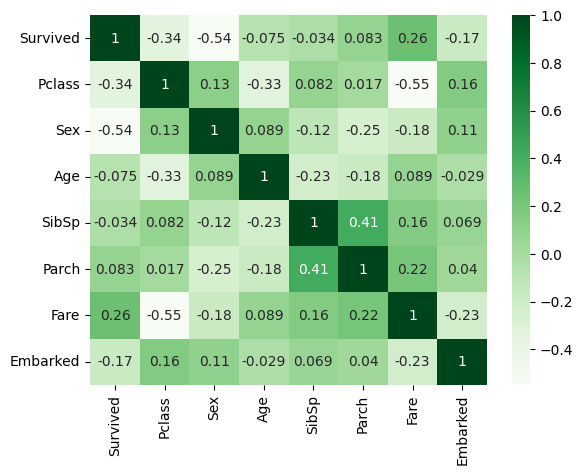

In [44]:
sns.heatmap(data=df.corr(), annot=True, cmap="Greens")
plt.show()

### Training the data - for Survival Prediction

In [25]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
regressor = LogisticRegression()

In [28]:
regressor.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = regressor.predict(X_test)

##### Classification report & Checking the accuarcy of the result

In [30]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.87      0.87       166\n           1       0.78      0.78      0.78       101\n\n    accuracy                           0.84       267\n   macro avg       0.82      0.82      0.82       267\nweighted avg       0.84      0.84      0.84       267\n'

In [31]:
confusion_matrix(y_test, y_pred)

"""
   | PN   PY
---+--------
AN | TN   FP
AY | FN   TP


accuracy score = (TN + TP) / (TN + TP + FN + FP)
"""

'\n   | PN   PY\n---+--------\nAN | TN   FP\nAY | FN   TP\n\n\naccuracy score = (TN + TP) / (TN + TP + FN + FP)\n'

In [32]:
accuracy_score(y_test, y_pred)

0.8352059925093633

In [33]:
# manually calculating accuracy score
(144 + 79) / (144 + 22 + 22 + 79)

0.8352059925093633

Here, the accuracy of our model is 83.52 % which is quite impressive.

#### Checking the survival possibility using my own predictor values

In [45]:
print("Min price:", df['Fare'].min())
print("Max price:", df['Fare'].max())

Min price: 0.0
Max price: 512.3292


In [47]:
def survival(list):
    if (regressor.predict([list])):
        print("The person could have survived the incident.")
    else:
        print("The person would have died anyway.")

In [50]:
# Pclass	Sex		Age		SibSp	Parch	Fare	Embarked
jack = [3, 1, 20, 0, 0, 0, 2]
rose = [1, 0, 17, 1, 2, 512.3292, 2]

survival(jack)
survival(rose)

The person would have died anyway.
The person could have survived the incident.
